<a href="https://colab.research.google.com/github/aditya9049/Unsupervised-Machine-Learning-/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
%matplotlib inline
import pandas as pd

In [ ]:
X,y=make_blobs(n_samples=1000,n_features=2,centers=3,random_state=23)

In [ ]:
X.shape

(1000, 2)

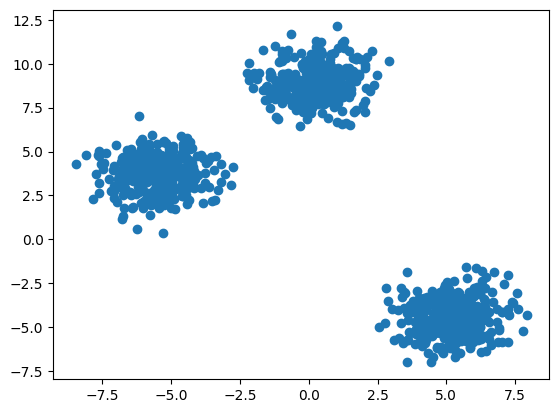

In [ ]:
plt.scatter(X[:,0],X[:,1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=23)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# manual method
#Elbow method to select the k value

wcss=[]
for K in range(1,11):
    kmeans=KMeans(n_clusters=K,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

[34131.539516172605,
 7986.924186891374,
 1345.6528673090697,
 1180.0592492835942,
 1063.562721716676,
 925.1415772921398,
 782.3295509708609,
 684.1986645142457,
 653.5478326620765,
 603.3264044704723]

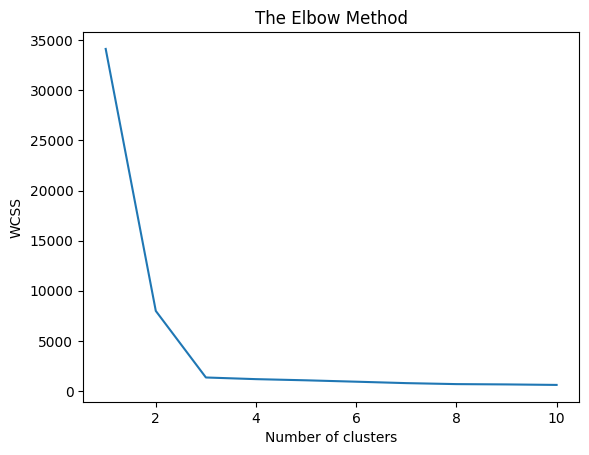

In [ ]:
#plot the elbow curve
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [ ]:
y_lables=kmeans.fit_predict(X_train)

In [ ]:
y_testlabels=kmeans.predict(X_test)

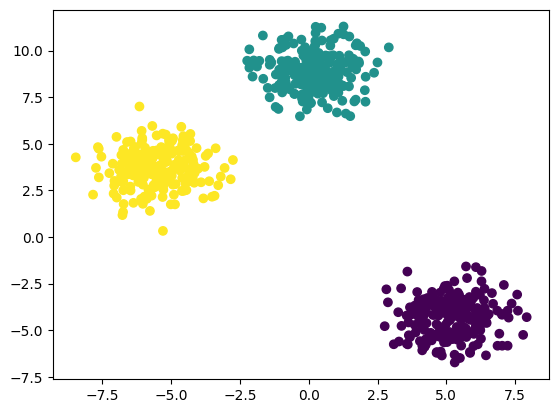

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_lables)

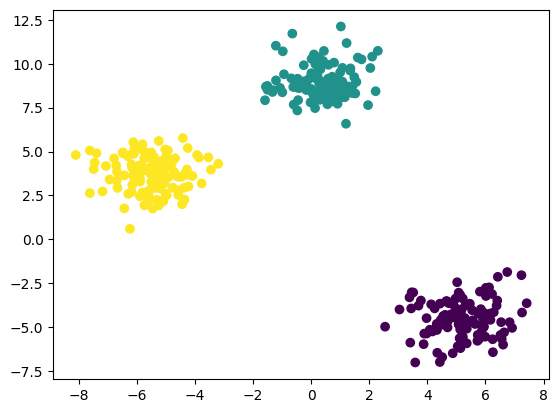

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_testlabels)

In [ ]:
#knee locater
!pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

np.int64(3)

In [ ]:
#performance metrices
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_cofficinets=[]
for K in range(2,11):
    kmeans=KMeans(n_clusters=K,init='k-means++')
    kmeans.fit(X_train)
    silhouette_cofficinets.append(silhouette_score(X_train,kmeans.labels_))


In [ ]:
silhouette_cofficinets


[np.float64(0.723922354530318),
 np.float64(0.8020003846062477),
 np.float64(0.634162917585799),
 np.float64(0.4666229760428749),
 np.float64(0.47078105803362946),
 np.float64(0.33050980285840015),
 np.float64(0.31987704632375935),
 np.float64(0.3360386761479712),
 np.float64(0.32912078655382826)]

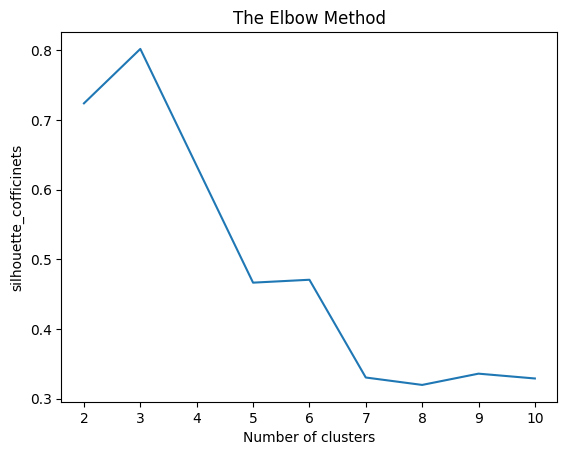

In [ ]:
plt.plot(range(2,11),silhouette_cofficinets)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_cofficinets')
plt.show()

In [ ]:
silhouette_score(X_train,y_lables)

np.float64(0.8020003846062477)